In [44]:
from __future__ import print_function

In [45]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

#Ipython.display is for audio output
import IPython.display

#Librosa is for audio
import librosa

#Display module for visualization
import librosa.display

In [48]:
audio_path = 'C:\Users\MichaelTelahun\Telahun\\1991__YouMayFindYourself.mp3'

y, sr = librosa.load(audio_path)

In [49]:
#Librosa by default resamples the signal to 22050Hz

#This can be changed with    librosa.load(audio_path, sr=None) 
                                #or                   sr=44100 

In [50]:
#MEL SPECTROGRAM

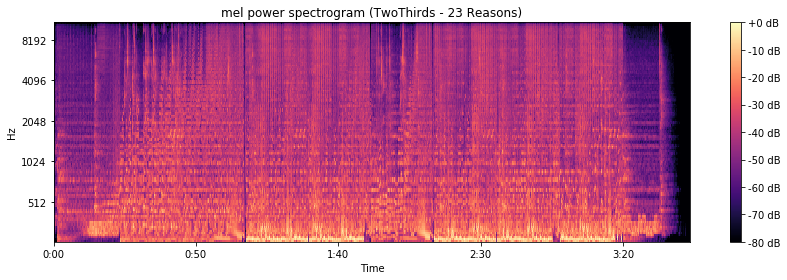

In [51]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

#Convert to log scale(dB) using peak power (Max) as a reference
log_S = librosa.power_to_db(S, ref=np.max)

#Make a new figure
plt.figure(figsize=(12,4))

#Display Spectrogram on mel scale
#Sanoke rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram (1991 - You May Find Yourself)')

#colorbar on the right
plt.colorbar(format='%+02.0f dB')

#make the layout compact
plt.tight_layout()

In [21]:
#HARMONIC-PERCUSSIVE SOURCE SEPARATION

In [52]:
#Using the effects module

y_harmonic, y_percussive = librosa.effects.hpss(y)

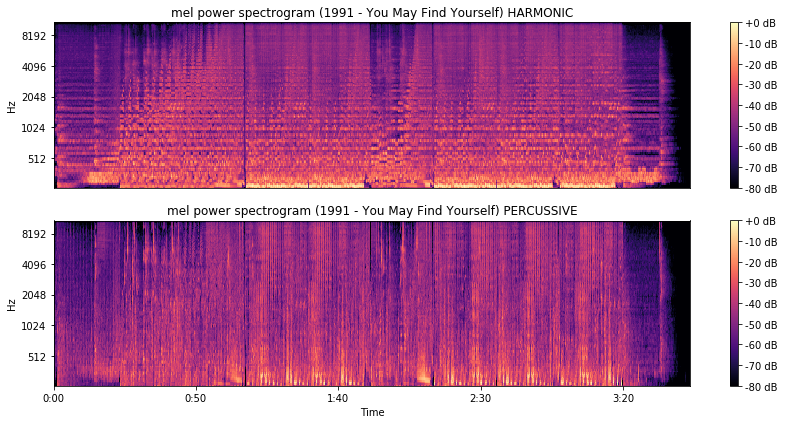

In [54]:
S_harmonic = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)

#display the spectrogram on mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

plt.title('mel power spectrogram (1991 - You May Find Yourself) HARMONIC')

plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram (1991 - You May Find Yourself) PERCUSSIVE')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [ ]:
#CHROMAGRAM

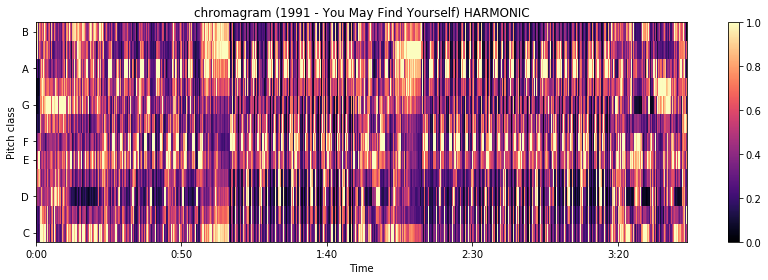

In [55]:
#CQT-based chromagram using harmonic component
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

plt.figure(figsize=(12,4))

#display chromagram with energy in each chromatic pitch class as a function of time
#set vmin and vmax for full range of chroma values in color span
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('chromagram (1991 - You May Find Yourself) HARMONIC')
plt.colorbar()

plt.tight_layout()

In [ ]:
#The one below is using the percussive component has a lot of pollution

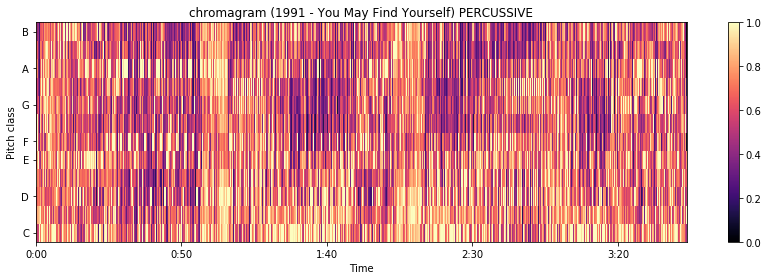

In [56]:
#CQT-based chromagram using harmonic component
C = librosa.feature.chroma_cqt(y=y_percussive, sr=sr)

plt.figure(figsize=(12,4))

#display chromagram with energy in each chromatic pitch class as a function of time
#set vmin and vmax for full range of chroma values in color span
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('chromagram (1991 - You May Find Yourself) PERCUSSIVE')
plt.colorbar()

plt.tight_layout()

In [30]:
#MFCC   --  MEL-FREQUENCY CEPSTRAL COEFFICIENTS

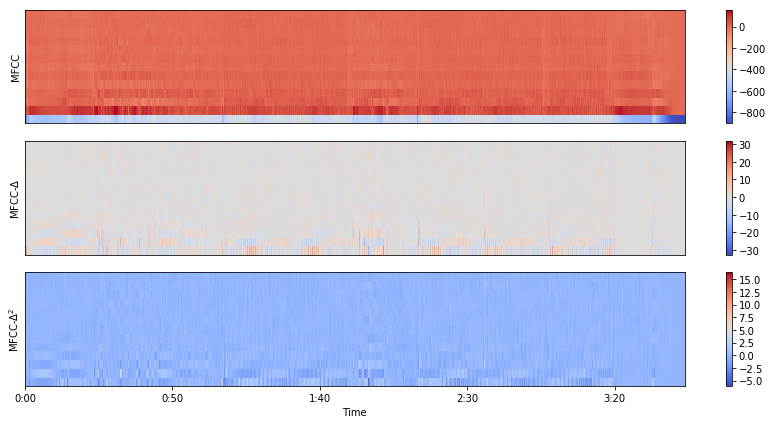

In [57]:
#Extrating the top 13 MFCCs
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

#pad on the first and second deltas
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

#Stack these all together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

In [34]:
#BEAT TRACKING - BPM

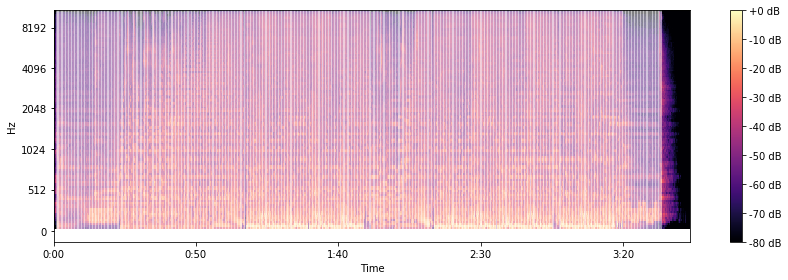

In [58]:
#using strength on the percussive component
plt.figure(figsize=(12,6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

#re-drawn spectrogram with overlay of the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

#draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha = 0.5)

plt.axis('tight')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

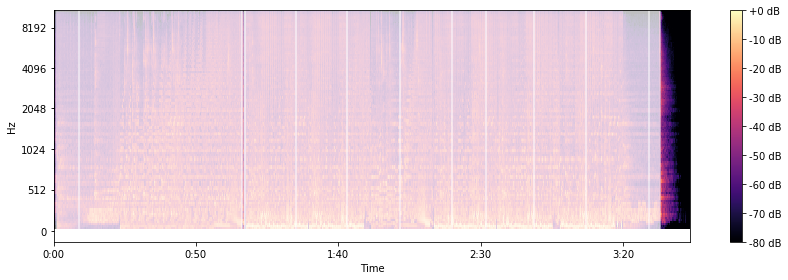

In [62]:
#using strength on the harmonic component
plt.figure(figsize=(12,6))
tempo, beats = librosa.beat.beat_track(y=y_harmonic, sr=sr)

#re-drawn spectrogram with overlay of the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

#draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha = 0.5)

plt.axis('tight')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [39]:
#By default the beat tracter will trim any leading or trailing beats that dont appear strong enough
#this can be disabled by calling: beat_track() with trim=False

In [59]:
print('Estimated tempo:      %.2f BPM' % tempo)

print('First 5 beat frames: ', beats[:5])

print('First 5 beat times:  ', librosa.frames_to_time(beats[:5], sr=sr))

#frames_to_time or time_to_frames

Estimated tempo:      117.45 BPM
First 5 beat frames:  [ 45  65  85 107 128]
First 5 beat times:   [ 1.04489796  1.50929705  1.97369615  2.48453515  2.9721542 ]


In [41]:
#BEAT-SYNCHRONOUS FEATURE AGGREGATION

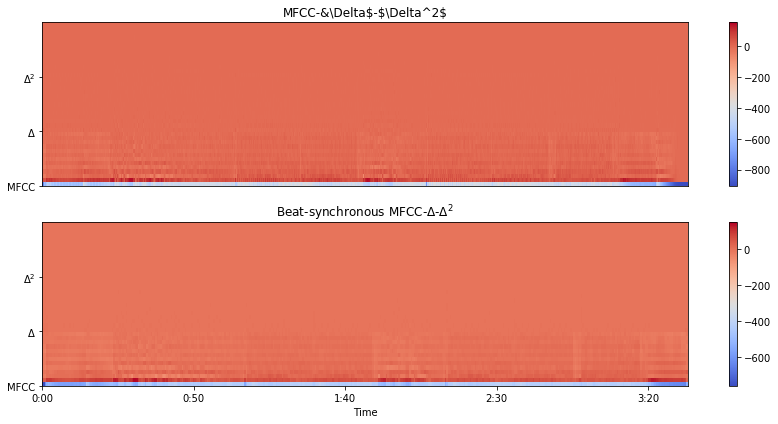

In [60]:
#usefull for reducing data dimensionality and removing transient noise from features
#summarizes the feature content of each beat

#feature.sync will summarize each beat event by the mean feature vector within that beat
M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12,6))

#original and beat synchronous features against each other
plt.subplot(2,1,1)
librosa.display.specshow(M)
plt.title('MFCC-&\Delta$-$\Delta^2$')

#marks the raw MFCC and the delta features
plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()
plt.subplot(2,1,2)

#librosa will also generate axis ticks from arbitrary timestamps and beat events also
librosa.display.specshow(M_sync, x_axis='time',
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Beat-synchronous MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

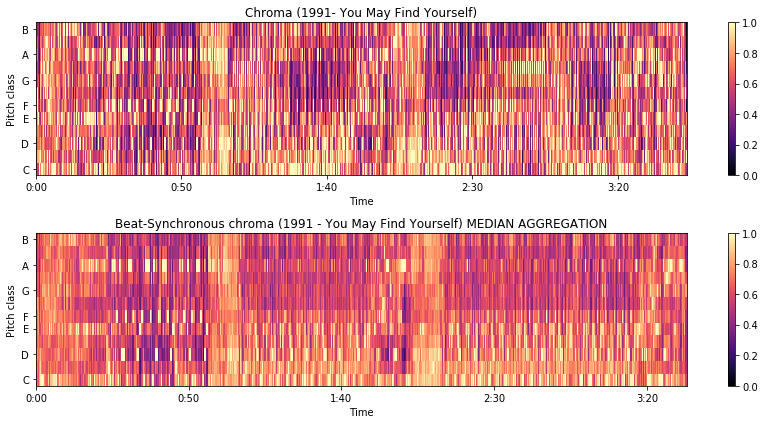

In [67]:
#Beat synchronization is flexible, computing the beat-synchronous chroma

C_sync = librosa.util.sync(C, beats, aggregate=np.median)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma (1991- You May Find Yourself)')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time',
                        x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.title('Beat-Synchronous chroma (1991 - You May Find Yourself) MEDIAN AGGREGATION')

plt.colorbar()
plt.tight_layout()